In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
import csv
import itertools
from datetime import datetime

list_rows = []
list_rows_with_data = []

format_string = '%m/%d/%Y %I:%M:%S %p'

with open('dataset/Export_Time.csv', newline='\n') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=',')
    for i,row in enumerate(csvreader):
        filters = row.get('Point Path').split('\\')
        row.pop('Point Path')
        row.pop('Process Value')
        row.pop('Unit')
        row.pop('Channel')
        row.pop('Detection')
        if row.get('Samples') == '0' or row.get('Data') == None or filters[7] == '7AO' or filters[7] == '8AO'or filters[7] == '7Hac'or filters[7] == '8Hac':
            list_rows_with_data.append(row)
        elif filters[6] == 'CONTRAEJE' and (filters[7] == '7HE3' or filters[7] == '8HE3') :
            row['DTS_new'] = datetime.strptime(row.pop('DTS'), format_string)
            row['point'] =  filters[7]
            data = [row.pop('Data')]
            row['newData'] = row.pop(None)
            row['newData'] = list(itertools.chain(data, row['newData']))
            list_rows.append(row)

In [3]:
one_list = list_rows[0]
one_list

{'Samples': '8192',
 'Max Time': '4.000',
 'Speed (Hz)': '2.757',
 'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 37),
 'point': '7HE3',
 'newData': ['0.011129',
  '-0.028003',
  '0.014197',
  '0.010107',
  '-0.009144',
  '-0.062354',
  '-0.097606',
  '-0.109307',
  '-0.048638',
  '-0.074415',
  '-0.029537',
  '-0.023642',
  '-0.079799',
  '-0.088011',
  '-0.011219',
  '0.019341',
  '0.053962',
  '-0.031342',
  '-0.050833',
  '-0.092372',
  '-0.010287',
  '-0.035704',
  '0.035523',
  '0.033057',
  '-0.026710',
  '-0.030049',
  '-0.065181',
  '0.011400',
  '-0.059165',
  '-0.009415',
  '-0.086477',
  '-0.107231',
  '-0.081333',
  '0.028304',
  '-0.035042',
  '0.027432',
  '-0.032876',
  '-0.089154',
  '-0.104434',
  '-0.092884',
  '-0.028755',
  '-0.048277',
  '-0.044787',
  '-0.125700',
  '-0.129700',
  '-0.077513',
  '-0.046592',
  '0.147808',
  '0.206522',
  '0.167690',
  '0.083710',
  '0.214974',
  '0.180263',
  '0.170758',
  '0.204867',
  '0.120376',
  '0.045479',
  '-0.034170',

In [ ]:
one_list['newData']

['0.011129',
 '-0.028003',
 '0.014197',
 '0.010107',
 '-0.009144',
 '-0.062354',
 '-0.097606',
 '-0.109307',
 '-0.048638',
 '-0.074415',
 '-0.029537',
 '-0.023642',
 '-0.079799',
 '-0.088011',
 '-0.011219',
 '0.019341',
 '0.053962',
 '-0.031342',
 '-0.050833',
 '-0.092372',
 '-0.010287',
 '-0.035704',
 '0.035523',
 '0.033057',
 '-0.026710',
 '-0.030049',
 '-0.065181',
 '0.011400',
 '-0.059165',
 '-0.009415',
 '-0.086477',
 '-0.107231',
 '-0.081333',
 '0.028304',
 '-0.035042',
 '0.027432',
 '-0.032876',
 '-0.089154',
 '-0.104434',
 '-0.092884',
 '-0.028755',
 '-0.048277',
 '-0.044787',
 '-0.125700',
 '-0.129700',
 '-0.077513',
 '-0.046592',
 '0.147808',
 '0.206522',
 '0.167690',
 '0.083710',
 '0.214974',
 '0.180263',
 '0.170758',
 '0.204867',
 '0.120376',
 '0.045479',
 '-0.034170',
 '-0.032726',
 '0.000511',
 '-0.032726',
 '0.014348',
 '0.018859',
 '-0.044938',
 '0.036395',
 '-0.049029',
 '0.046021',
 '-0.030320',
 '-0.058534',
 '-0.132889',
 '-0.118120',
 '-0.118120',
 '-0.060850',
 '-

In [ ]:
y = np.array([float(item) for item in one_list.get('newData')])

In [ ]:
x = np.linspace(0,float(one_list.get('Max Time')),len(one_list.get('newData')))

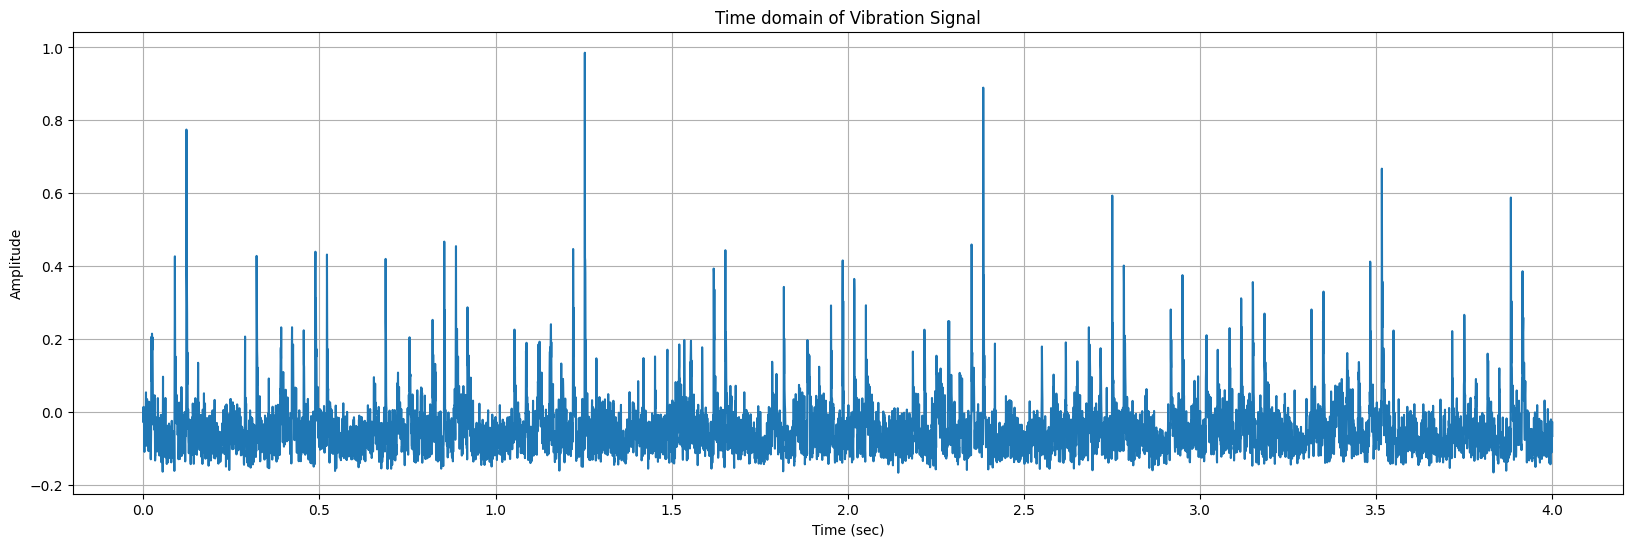

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(x,y)
plt.title('Time domain of Vibration Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
from scipy.fft import fft, fftfreq

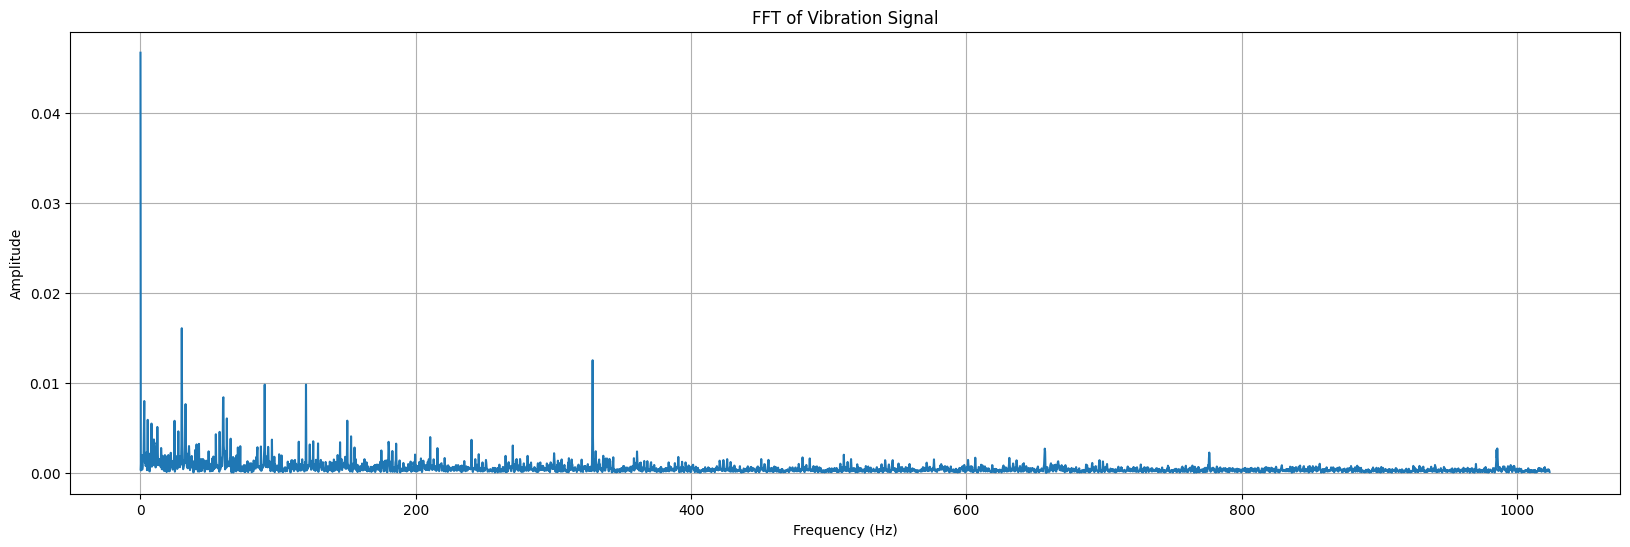

In [ ]:
N = len(x)
sampling_freq = 1 / (x[1]-x[0])

amplitude_fft = fft(y)
freq = fftfreq(N, d = 1/sampling_freq)

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(freq[:N//2], np.abs(amplitude_fft)[:N//2] * 1/N)
plt.title('FFT of Vibration Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
len(amplitude_fft)

8192

In [ ]:
len(freq)

8192

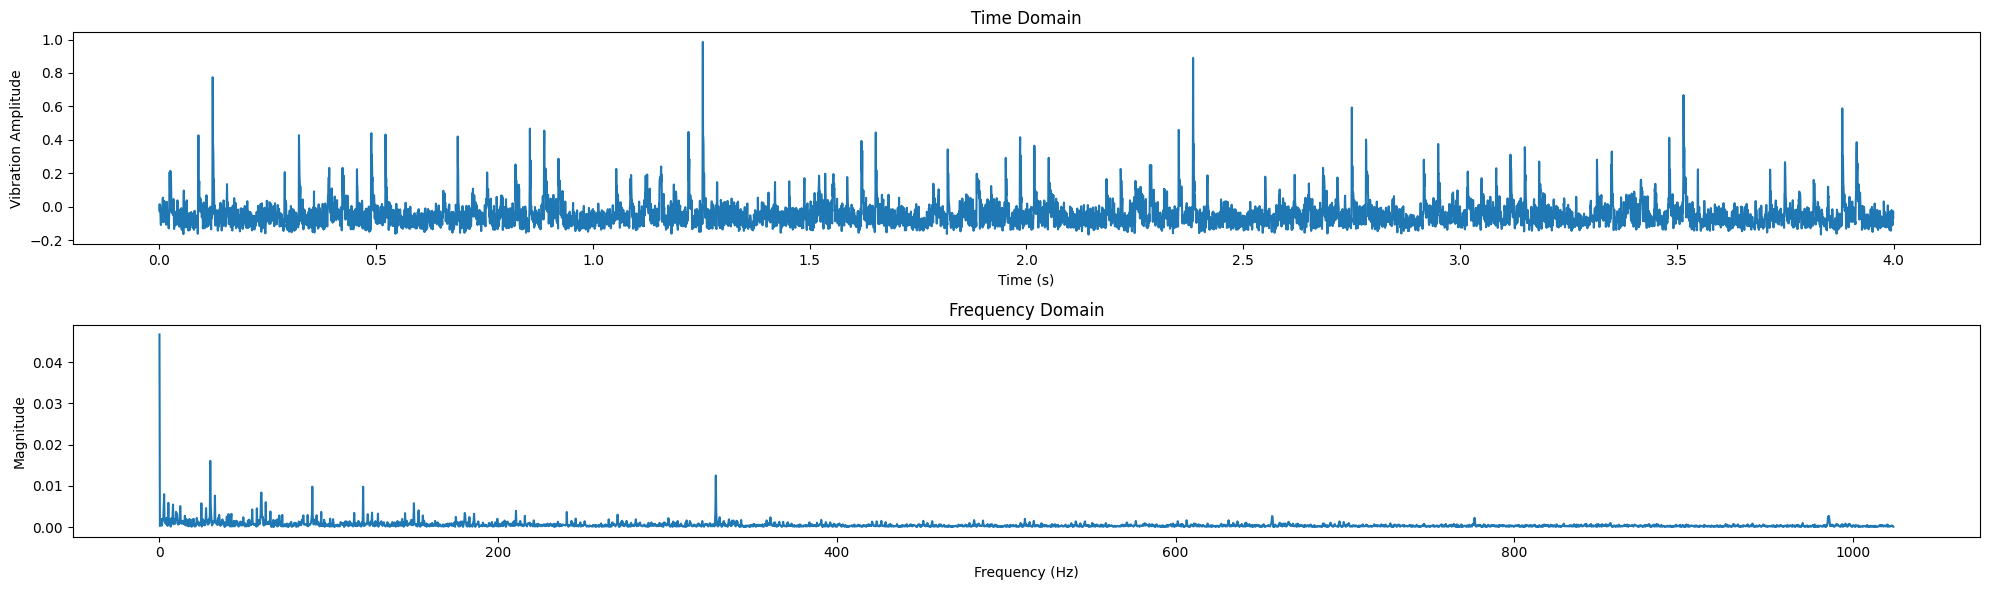

In [ ]:
# Load your vibration data from a CSV file
# Assume the CSV file has a single column of vibration data with a header
# data = pd.read_csv('vibration_data.csv')

y = np.array([float(item) for item in one_list.get('newData')])
# vibration_data = data['Vibration'].values
vibration_data = y
# Time parameters
sampling_rate = 2048  # Hz, example sampling rate
n = len(vibration_data)
time = np.arange(n) / sampling_rate

# Perform FFT
freq_domain = np.fft.fft(vibration_data)
freq = np.fft.fftfreq(n, d=1/sampling_rate)

x_freq = freq[:n//2]
y_freq = np.abs(freq_domain)[:n//2] * 1/n


# Plot the results
plt.figure(figsize=(20,6))

# Time domain plot
plt.subplot(2, 1, 1)
plt.plot(time, vibration_data)
plt.title('Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Vibration Amplitude')

# Frequency domain plot
plt.subplot(2, 1, 2)
plt.plot(freq[:n//2], np.abs(freq_domain)[:n//2] * 1/n)
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


In [ ]:
len(freq[:n//2])

4096

In [ ]:
len(np.abs(freq_domain)[:n//2] * 1/n)

4096

In [ ]:
data_names = ['HE3_'+str(i).zfill(3) for i in range(len(list_rows[0].get('newData')))]

In [ ]:
list_rows_freq = list_rows.copy()

In [ ]:
for item in list_rows_freq:
    y = np.array([float(item) for item in item.get('newData')])
    item.pop('newData')
    # vibration_data = data['Vibration'].values
    vibration_data = y
    # Time parameters
    sampling_rate = 2048  # Hz, example sampling rate
    n = len(vibration_data)
    time = np.arange(n) / sampling_rate

    # Perform FFT
    freq_domain = np.fft.fft(vibration_data)
    freq = np.fft.fftfreq(n, d=1/sampling_rate)

    x_freq = freq[:n//2]
    y_freq = np.abs(freq_domain)[:n//2] * 1/n
    item['data_freq'] = y_freq


In [ ]:
list(list_rows_freq[1].get('data_freq'))

[0.0541998984375,
 0.000927210638692541,
 0.0020226173471735985,
 0.0003011262185237144,
 0.0008991630497145924,
 0.0009010536156208174,
 0.0011405561061272696,
 0.0022871106694873685,
 0.0008909017047448034,
 0.0023876796815732733,
 0.005902806736148813,
 0.010077900915617477,
 0.0012561175220001362,
 0.0024948929723214177,
 0.0014802928705323216,
 0.000696416341845269,
 0.0006779721825508235,
 0.0035276276782986106,
 0.000397471489340553,
 0.0001652345246318672,
 0.0005026371087865165,
 0.0011655261629404789,
 0.0018615097546592777,
 0.0015761055647469488,
 0.0004297375737394556,
 0.0012430264918568328,
 0.001447187609762539,
 0.0011887115740639072,
 0.0020037606464962045,
 0.0009242323843700725,
 0.0007554802608875712,
 0.002850466917431033,
 0.0033683093677478676,
 0.001469174644368336,
 0.0009975644272612605,
 0.0007691337312888925,
 9.251217213597874e-05,
 0.0014668494630591196,
 0.0014367537954974616,
 0.0017829909869627929,
 0.00018885468190766414,
 0.002258987170005914,
 0.003

In [ ]:
new_list_rows_1 = []
samples = []
list_rows_1 = list_rows_freq.copy()
for item in list_rows_1:
    samples = item.pop('data_freq')
    for i,sample in enumerate(samples):
        dnames = 'HE3_'+str(i).zfill(4)
        item[dnames] = float(sample)
        # new_list_rows.append(item.copy())
    new_list_rows_1.append(item.copy())

In [ ]:
# new_list_rows_2 = []
# samples = []
# list_rows_2 = list_rows.copy()
# for item in list_rows_2:
#     samples = item.pop('newData')
#     for i,sample in enumerate(samples):
#         dnames = 'HE3_'+str(i).zfill(3)
#         item[dnames] = float(sample)
#         # new_list_rows.append(item.copy())
#     new_list_rows_2.append(item.copy())

In [ ]:
new_list_rows_1

[{'Samples': '8192',
  'Max Time': '4.000',
  'Speed (Hz)': '2.757',
  'DTS_new': datetime.datetime(2024, 6, 24, 10, 36, 37),
  'point': '7HE3',
  'HE3_0000': 0.04668320581054687,
  'HE3_0001': 0.0002607723015254541,
  'HE3_0002': 0.001386750692241042,
  'HE3_0003': 0.0010386403817804317,
  'HE3_0004': 0.0019075890158173421,
  'HE3_0005': 0.00034480247071788856,
  'HE3_0006': 0.0006470390691410812,
  'HE3_0007': 0.0019538619934218486,
  'HE3_0008': 0.0016556395497541272,
  'HE3_0009': 0.0019108892957578573,
  'HE3_0010': 0.004783688236000675,
  'HE3_0011': 0.007971504358147854,
  'HE3_0012': 0.0015905742014729212,
  'HE3_0013': 0.0010974845076573531,
  'HE3_0014': 0.0013482118545697684,
  'HE3_0015': 0.0007587519142259271,
  'HE3_0016': 0.0009520176919040183,
  'HE3_0017': 0.0022534160423328337,
  'HE3_0018': 0.0017114815754390523,
  'HE3_0019': 0.0002861753568238749,
  'HE3_0020': 0.0022150997124637337,
  'HE3_0021': 0.0058806910180733574,
  'HE3_0022': 0.001680382519604789,
  'HE3_00

In [ ]:
data = pd.DataFrame(new_list_rows_1)

In [ ]:
df = data.copy()

In [ ]:
df.head()

Samples Max Time Speed (Hz)             DTS_new point  HE3_0000  HE3_0001  \
0    8192    4.000      2.757 2024-06-24 10:36:37  7HE3  0.046683  0.000261   
1    8192    4.000      2.833 2024-06-17 11:28:41  7HE3  0.054200  0.000927   
2    8192    4.000      2.833 2024-06-10 09:40:42  7HE3  0.054417  0.001476   
3    8192    4.000      2.833 2024-06-03 07:53:44  7HE3  0.062481  0.003246   
4    8192    4.000      2.833 2024-05-26 09:41:22  7HE3  0.072120  0.002794   

   HE3_0002  HE3_0003  HE3_0004  ...  HE3_4086  HE3_4087  HE3_4088  HE3_4089  \
0  0.001387  0.001039  0.001908  ...  0.000218  0.000134  0.000162  0.000268   
1  0.002023  0.000301  0.000899  ...  0.000219  0.000382  0.000441  0.000173   
2  0.000771  0.001044  0.000865  ...  0.000158  0.000122  0.000295  0.000170   
3  0.000756  0.000754  0.000627  ...  0.000372  0.000105  0.000244  0.000448   
4  0.001215  0.001415  0.000158  ...  0.000165  0.000345  0.001764  0.000329   

   HE3_4090  HE3_4091  HE3_4092  HE3_4093  HE3_4094  HE3_4095  
0  0.000370  0.000379  0.000378  0.000234  0.000257  0.000086  
1  0.000490  0.000334  0.000204  0.000385  0.000148  0.000260  
2  0.000361  0.001054  0.000247  0.000356  0.000613  0.000130  
3  0.000477  0.000742  0.000603  0.000542  0.000359  0.001301  
4  0.000535  0.000534  0.000139  0.000184  0.000211  0.000110  

[5 rows x 4101 columns]

In [ ]:
# df['DTS_new'] = df['DTS_new'].dt.date

In [ ]:
df['Samples'].unique()

array(['8192'], dtype=object)

In [ ]:
df.loc[df['point'] == '7HE3','point'] = 0

In [ ]:
df.loc[df['point'] == '8HE3','point'] = 1

In [ ]:
df.rename(columns={'point':'target'}, inplace = True)

In [ ]:
df.head()

Samples Max Time Speed (Hz)             DTS_new target  HE3_0000  HE3_0001  \
0    8192    4.000      2.757 2024-06-24 10:36:37      0  0.046683  0.000261   
1    8192    4.000      2.833 2024-06-17 11:28:41      0  0.054200  0.000927   
2    8192    4.000      2.833 2024-06-10 09:40:42      0  0.054417  0.001476   
3    8192    4.000      2.833 2024-06-03 07:53:44      0  0.062481  0.003246   
4    8192    4.000      2.833 2024-05-26 09:41:22      0  0.072120  0.002794   

   HE3_0002  HE3_0003  HE3_0004  ...  HE3_4086  HE3_4087  HE3_4088  HE3_4089  \
0  0.001387  0.001039  0.001908  ...  0.000218  0.000134  0.000162  0.000268   
1  0.002023  0.000301  0.000899  ...  0.000219  0.000382  0.000441  0.000173   
2  0.000771  0.001044  0.000865  ...  0.000158  0.000122  0.000295  0.000170   
3  0.000756  0.000754  0.000627  ...  0.000372  0.000105  0.000244  0.000448   
4  0.001215  0.001415  0.000158  ...  0.000165  0.000345  0.001764  0.000329   

   HE3_4090  HE3_4091  HE3_4092  HE3_4093  HE3_4094  HE3_4095  
0  0.000370  0.000379  0.000378  0.000234  0.000257  0.000086  
1  0.000490  0.000334  0.000204  0.000385  0.000148  0.000260  
2  0.000361  0.001054  0.000247  0.000356  0.000613  0.000130  
3  0.000477  0.000742  0.000603  0.000542  0.000359  0.001301  
4  0.000535  0.000534  0.000139  0.000184  0.000211  0.000110  

[5 rows x 4101 columns]

In [ ]:
df['DTS_new']

0     2024-06-24 10:36:37
1     2024-06-17 11:28:41
2     2024-06-10 09:40:42
3     2024-06-03 07:53:44
4     2024-05-26 09:41:22
              ...        
99    2023-08-07 10:11:43
100   2023-08-01 14:06:54
101   2023-07-25 10:15:00
102   2023-07-17 09:52:30
103   2023-07-10 09:13:21
Name: DTS_new, Length: 104, dtype: datetime64[ns]

In [ ]:
df['Year'] = df['DTS_new'].dt.year
df['month'] = df['DTS_new'].dt.month
df['day'] = df['DTS_new'].dt.day


In [ ]:
 df['Speed (Hz)'] = pd.to_numeric(df['Speed (Hz)'])

TypeError: Cannot cast DatetimeArray to dtype float64

In [ ]:
df.drop(columns=['DTS_new','Samples','Max Time'], inplace=True)

KeyError: "['DTS_new', 'Samples', 'Max Time'] not found in axis"

In [ ]:
df = df.astype(float)

Speed (Hz) target  HE3_0000  HE3_0001  HE3_0002  HE3_0003  HE3_0004  \
0         2.757      0  0.046683  0.000261  0.001387  0.001039  0.001908   
1         2.833      0  0.054200  0.000927  0.002023  0.000301  0.000899   
2         2.833      0  0.054417  0.001476  0.000771  0.001044  0.000865   
3         2.833      0  0.062481  0.003246  0.000756  0.000754  0.000627   
4         2.833      0  0.072120  0.002794  0.001215  0.001415  0.000158   
..          ...    ...       ...       ...       ...       ...       ...   
99        2.833      1  0.041911  0.002748  0.001333  0.000604  0.000860   
100       2.833      1  0.043198  0.002098  0.000427  0.000502  0.000055   
101       2.833      1  0.106175  0.007426  0.002280  0.003780  0.001508   
102       2.833      1  0.047751  0.003043  0.001532  0.001645  0.000743   
103       2.833      1  0.029720  0.000644  0.001269  0.000512  0.000165   

     HE3_0005  HE3_0006  HE3_0007  ...  HE3_4089  HE3_4090  HE3_4091  \
0    0.000345  0.000647  0.001954  ...  0.000268  0.000370  0.000379   
1    0.000901  0.001141  0.002287  ...  0.000173  0.000490  0.000334   
2    0.000452  0.000915  0.000723  ...  0.000170  0.000361  0.001054   
3    0.000975  0.001108  0.001495  ...  0.000448  0.000477  0.000742   
4    0.001252  0.000604  0.000356  ...  0.000329  0.000535  0.000534   
..        ...       ...       ...  ...       ...       ...       ...   
99   0.000514  0.000533  0.000706  ...  0.000606  0.000365  0.000456   
100  0.000068  0.000528  0.000687  ...  0.000205  0.000123  0.000328   
101  0.001860  0.002686  0.002355  ...  0.000490  0.000176  0.000358   
102  0.000551  0.000739  0.000989  ...  0.000046  0.000684  0.000195   
103  0.000373  0.000464  0.000163  ...  0.000272  0.000090  0.000334   

     HE3_4092  HE3_4093  HE3_4094  HE3_4095  Year  month  day  
0    0.000378  0.000234  0.000257  0.000086  2024      6   24  
1    0.000204  0.000385  0.000148  0.000260  2024      6   17  
2    0.000247  0.000356  0.000613  0.000130  2024      6   10  
3    0.000603  0.000542  0.000359  0.001301  2024      6    3  
4    0.000139  0.000184  0.000211  0.000110  2024      5   26  
..        ...       ...       ...       ...   ...    ...  ...  
99   0.000485  0.000322  0.000242  0.000329  2023      8    7  
100  0.000172  0.000172  0.000334  0.000202  2023      8    1  
101  0.000176  0.000367  0.000259  0.000540  2023      7   25  
102  0.000279  0.000105  0.000163  0.000261  2023      7   17  
103  0.000133  0.000350  0.000348  0.000320  2023      7   10  

[104 rows x 4101 columns]

In [ ]:
df.to_csv('dataset/data_pinion_horizontal_freq.csv',sep=',',encoding='utf-8', index=False)

In [ ]:
print(df.columns.to_list())

['Speed (Hz)', 'target', 'HE3_0000', 'HE3_0001', 'HE3_0002', 'HE3_0003', 'HE3_0004', 'HE3_0005', 'HE3_0006', 'HE3_0007', 'HE3_0008', 'HE3_0009', 'HE3_0010', 'HE3_0011', 'HE3_0012', 'HE3_0013', 'HE3_0014', 'HE3_0015', 'HE3_0016', 'HE3_0017', 'HE3_0018', 'HE3_0019', 'HE3_0020', 'HE3_0021', 'HE3_0022', 'HE3_0023', 'HE3_0024', 'HE3_0025', 'HE3_0026', 'HE3_0027', 'HE3_0028', 'HE3_0029', 'HE3_0030', 'HE3_0031', 'HE3_0032', 'HE3_0033', 'HE3_0034', 'HE3_0035', 'HE3_0036', 'HE3_0037', 'HE3_0038', 'HE3_0039', 'HE3_0040', 'HE3_0041', 'HE3_0042', 'HE3_0043', 'HE3_0044', 'HE3_0045', 'HE3_0046', 'HE3_0047', 'HE3_0048', 'HE3_0049', 'HE3_0050', 'HE3_0051', 'HE3_0052', 'HE3_0053', 'HE3_0054', 'HE3_0055', 'HE3_0056', 'HE3_0057', 'HE3_0058', 'HE3_0059', 'HE3_0060', 'HE3_0061', 'HE3_0062', 'HE3_0063', 'HE3_0064', 'HE3_0065', 'HE3_0066', 'HE3_0067', 'HE3_0068', 'HE3_0069', 'HE3_0070', 'HE3_0071', 'HE3_0072', 'HE3_0073', 'HE3_0074', 'HE3_0075', 'HE3_0076', 'HE3_0077', 'HE3_0078', 'HE3_0079', 'HE3_0080', 'HE

In [ ]:
X = df.copy()

In [ ]:
X.drop(columns=['target'], inplace=True)

In [ ]:
y = df[['target']].copy()

In [ ]:
# sns.heatmap(X.corr(), annot = X.corr())

In [ ]:
X.dtypes

Speed (Hz)    float64
HE3_0000      float64
HE3_0001      float64
HE3_0002      float64
HE3_0003      float64
               ...   
HE3_4094      float64
HE3_4095      float64
Year            int32
month           int32
day             int32
Length: 4100, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split #sklearn tiene gran cantidad de funciones para todo lo relacionado al ML
import statsmodels.api as sm # Statsmodels

In [ ]:
X = sm.add_constant(X) 

In [ ]:
# y = y.to_numpy()

In [ ]:
# X =X.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # random state y seed metodo aleatorio simple

In [ ]:
X_train.shape       

(83, 4101)

In [ ]:
X_test.shape

(21, 4101)

In [ ]:
y_train.shape

(83, 1)

In [ ]:
y_test.shape

(21, 1)

In [ ]:
X_train

const  Speed (Hz)  HE3_0000  HE3_0001  HE3_0002  HE3_0003  HE3_0004  \
73     1.0       2.833  0.066617  0.004700  0.002421  0.002946  0.001252   
7      1.0       2.833  0.042973  0.001160  0.001536  0.000740  0.001260   
18     1.0       2.833  0.065271  0.000911  0.001650  0.000510  0.000806   
17     1.0       2.833  0.054224  0.001384  0.000669  0.000653  0.001072   
33     1.0       2.833  0.093970  0.001649  0.002009  0.000873  0.001245   
..     ...         ...       ...       ...       ...       ...       ...   
70     1.0       2.833  0.040960  0.002190  0.001859  0.000892  0.001727   
25     1.0       2.833  0.076173  0.001037  0.002176  0.001178  0.000247   
103    1.0       2.833  0.029720  0.000644  0.001269  0.000512  0.000165   
71     1.0       2.833  0.022725  0.005154  0.002465  0.002755  0.000691   
59     1.0       2.833  0.096144  0.004047  0.000829  0.001996  0.001026   

     HE3_0005  HE3_0006  HE3_0007  ...  HE3_4089  HE3_4090  HE3_4091  \
73   0.002114  0.002207  0.003057  ...  0.000376  0.000036  0.000089   
7    0.001282  0.002207  0.001438  ...  0.000183  0.000075  0.000118   
18   0.001184  0.001451  0.001054  ...  0.000377  0.000225  0.000402   
17   0.000738  0.002677  0.001305  ...  0.000459  0.000966  0.001088   
33   0.000424  0.000830  0.002023  ...  0.000418  0.000360  0.000154   
..        ...       ...       ...  ...       ...       ...       ...   
70   0.000606  0.002313  0.002047  ...  0.000276  0.000081  0.000258   
25   0.001925  0.002699  0.001268  ...  0.000566  0.000432  0.000434   
103  0.000373  0.000464  0.000163  ...  0.000272  0.000090  0.000334   
71   0.001121  0.000742  0.001333  ...  0.000190  0.000112  0.000379   
59   0.000370  0.001085  0.002893  ...  0.001711  0.000755  0.000352   

     HE3_4092  HE3_4093  HE3_4094  HE3_4095  Year  month  day  
73   0.000125  0.000717  0.000367  0.000306  2024      2    5  
7    0.000204  0.000234  0.000026  0.000066  2024      5    6  
18   0.000729  0.000354  0.000246  0.000125  2024      2   25  
17   0.000737  0.000387  0.000436  0.000056  2024      2   25  
33   0.000988  0.001858  0.000590  0.000161  2023     10   30  
..        ...       ...       ...       ...   ...    ...  ...  
70   0.000146  0.000187  0.000380  0.000170  2024      2   25  
25   0.000292  0.000128  0.000120  0.000340  2024      1    8  
103  0.000133  0.000350  0.000348  0.000320  2023      7   10  
71   0.000389  0.000295  0.000061  0.000358  2024      2   20  
59   0.000281  0.000297  0.000066  0.000381  2024      5   13  

[83 rows x 4101 columns]

In [ ]:
y_train

target
73       1
7        0
18       0
17       0
33       0
..     ...
70       1
25       0
103      1
71       1
59       1

[83 rows x 1 columns]

In [ ]:
X_train.dtypes

const         float64
Speed (Hz)    float64
HE3_0000      float64
HE3_0001      float64
HE3_0002      float64
               ...   
HE3_4094      float64
HE3_4095      float64
Year            int32
month           int32
day             int32
Length: 4101, dtype: object

In [ ]:
# Definir el modelo

modelo = sm.OLS(y_train, X_train) # Ordinary Least Squares : Metodo de los Minimos Cuadrados Ordinarios (Analisis de Regresion)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
print(resultados.summary()) # Imprimir o mostrar un resumen del modelo de Regresion que he creado

In [ ]:
from sklearn.metrics import r2_score # modulo llamado metrics el cual me va a permitir obtener distintos indicadores de calidad

In [ ]:
# Entrenamos el modelo

resultados = modelo.fit() # fit es la funcion de entrenamiento de modelos de ML

NameError: name 'modelo' is not defined

In [ ]:
from sklearn.linear_model import Ridge # OLS mejorado (que tiene un factor llamado regularizacion)
from sklearn.linear_model import Lasso # OLS mejorado (que tiene un factor llamado regularizacion)
from sklearn.linear_model import ElasticNet # OLS mejorado (que en teoria tiene mas factores de regularizacion)
from sklearn.ensemble import RandomForestRegressor # Modelo computacional no tiene una ecuacion

In [ ]:
modelo_RG = Ridge() # Definir el modelo de Ridge

modelo_RG.fit(X = X_train, y = y_train) # Entrenar el modelo de Ridge

Ridge()